# Solutions

:::{solution} exercise_5_3

:::

In order to repeatedly apply the 2d average to the array, just repeatedly update the value of the array `x` using ` x = moving_average_2d(x)`. You don't have to make any changes to the function itself!

Let's start with a simple example - a 5 by 5 array with a single cell in the centre initally set to `1`.


initial grid: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Step 0 [[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]
Step 1 [[0.         0.         0.         0.         0.        ]
 [0.         0.04938272 0.07407407 0.04938272 0.        ]
 [0.         0.07407407 0.11111111 0.07407407 0.        ]
 [0.         0.04938272 0.07407407 0.04938272 0.        ]
 [0.         0.         0.         0.         0.        ]]
Step 2 [[0.         0.         0.         0.         0.        ]
 [0.         0.03429355 0.04801097 0.03429355 0.        ]
 [0.         0.04801097 0.06721536 0.04801097 0.        ]
 [0.         0.03429355 0.04801097 0.03429355 0.        ]
 [0.         0.         0.         0.         0.        ]]
S

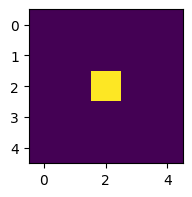

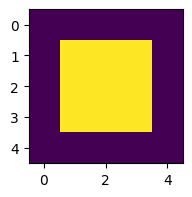

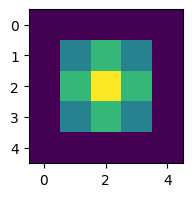

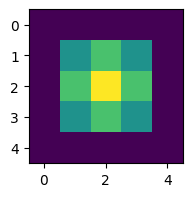

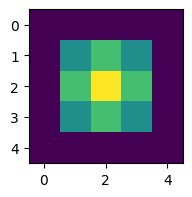

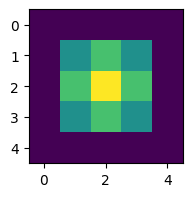

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average_2d(x):
    # create empty array of correct dimensions
    n, m = x.shape
    result = np.zeros((n, m))
    
    # fill in moving avg
    for i in range(1, n-1):
        for j in range(1, m-1):
            sub_array = x[i-1:i+2, j-1:j+2]
            result[i, j] = np.average(sub_array)
           
    return result

# create 5 by 5 grid and set central
# cell to 1
grid = np.zeros((5, 5))
grid[2,2] = 1
print("initial grid:", grid)

# plot the initial grid
plt.figure(figsize=(2,2))
plt.imshow(grid)

# repeatedly apply the function
for i in range(5):
    grid = moving_average_2d(grid)
    plt.figure(figsize=(2,2))
    plt.imshow(grid)
    print("Step", i, grid)


To make it look like the figure in the question, we have to change a few things:

1. Increase the number of cells.
2. Use the `imshow` arguments `vmax` and `vmin` to change the [scaling of the colormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) so that its range is between 0 and 1 (rather than the default, which is the maximum and minimum values of each array).
3. Plot all the arrays on a single figure using `plt.subplots` (see {numref}`notes-subplots-ref`).

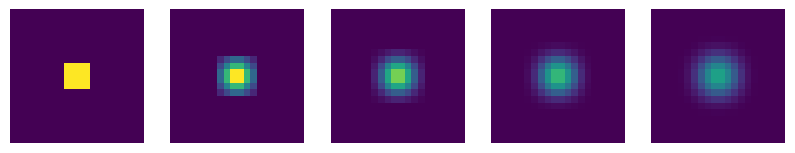

In [16]:
# Create a large array and set central cells to 1
grid = np.zeros((20, 20))
grid[8:12,8:12] = 1

# Create a figure with 5 subplots
num = 5
fig, axes = plt.subplots(1, num, figsize=(10,2))

# Plot initial grid
axes[0].imshow(grid, vmin=0, vmax=1)
axes[0].axis("off")


for i in range(num-1):
    grid = moving_average_2d(grid)
    axes[i+1].imshow(grid, vmin=0, vmax=1)
    axes[i+1].axis("off")



To make it look identical to the figure, you'd have to use a different diffusion model. See {numref}`notes-subplots-ref`.

:::{solution} exercise_5_3_b

:::

1.

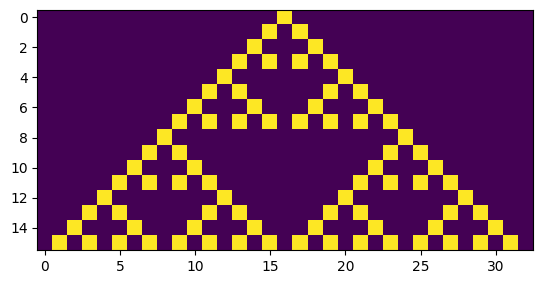

In [12]:
def rule_90(xarray):
    n = len(xarray)
    result = np.zeros(n)
    for i in range(1, n-1):
        p = xarray[i-1] # left neighbour
        q = xarray[i+1] # right neighbour
        # p + q = 1 when
        # one of p and q is 1
        if (p + q == 1):
            result[i] = 1
        else:
            result[i] = 0
    return result

n_cells = 33
n_iterations = 15

x = np.zeros(n_cells)
x[n_cells // 2] = 1 # sets the central cell to 1

automaton = np.zeros((n_iterations + 1, n_cells))
automaton[0,:] = x # set the top row to the initial x

for i in range(n_iterations):
    x = rule_90(x)
    automaton[i+1,:] = x

plt.imshow(automaton)

2.

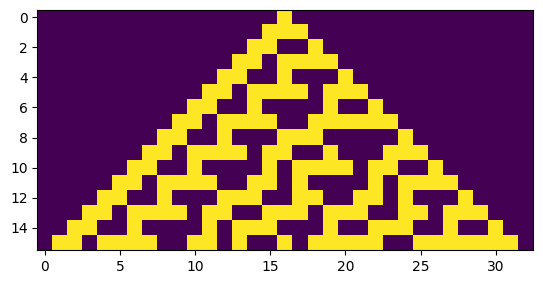

In [14]:
def rule_30(xarray):
    n = len(xarray)
    result = np.zeros(n)
    for i in range(1, n-1):
        k = np.sum(xarray[i-1:i+2])
        if k == 0 or k == 3:
            result[i] = 0
        elif k == 1:
            result[i] = 1
        elif k == 2 and xarray[i-1] == 0:
            result[i] = 1
        else:
            result[i] = 0
    return result

n_cells = 33
n_iterations = 15

x = np.zeros(n_cells)
x[n_cells // 2] = 1 # sets the central cell to 1

automaton = np.zeros((n_iterations + 1, n_cells))
automaton[0,:] = x # set the top row to the initial x

for i in range(n_iterations):
    x = rule_30(x)
    automaton[i+1,:] = x

plt.imshow(automaton)

:::{solution} exercise_5_5

:::

First, let's define the function `count_neighbours` which returns the number of live neighbours of cell `i`, `j`. This is just the sum of the 3 by 3 subarray minus the value of the cell `i`, `j`. Note that this function returns a single number, not an array.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def count_neighbours(x, i, j):
    sub_array = x[i-1:i+2,j-1:j+2]
    return np.sum(sub_array) - x[i,j]

grid0:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Before we go any further, let's test it with the initial pattern shown in {numref}`game-of-life-2-iterations-fig`.

In [69]:
grid0 = np.zeros((5, 5))
grid0[2,1:4] = 1
grid0[1:4,2] = 1

print(grid0)

print(count_neighbours(grid0, 2, 2)) # should print 4
print(count_neighbours(grid0, 3, 3)) # should print 3
print(count_neighbours(grid0, 2, 1)) # should print 3

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
4.0
3.0
3.0


Next we construct the function `advance`. This function should take an array as input, and return another array as output. We can just adapt the `moving_average_2d` function.

In [37]:
def advance(x):
    # create empty array of correct dimensions
    n, m = x.shape
    result = np.zeros((n, m))
    
    # fill in array
    for i in range(1, n-1):
        for j in range(1, m-1):
            # count the neighbours of cell i, j
            c = count_neighbours(x, i, j)
            # implement the Game of Life rules:

            # If the cell is dead...
            if x[i,j] == 0:
                if c == 3:
                # ...and has exactly 3 neighbours,
                    # the cell becomes alive.
                    result[i,j] = 1
            # If the cell is alive...
            else:
                # ... and has 2 or 3 neighbours,
                if c == 2 or c == 3:
                    # the cell stays alive.
                    result[i,j] = 1 
    return result

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Now we'll test it on the same initial pattern. I've added an extra 1 cell of padding around the edges so the array becomes 7 by 7.

In [38]:

grid0 = np.zeros((7, 7))
grid0[3,2:5] = 1
grid0[2:5,3] = 1

print(grid0)

grid1 = advance(grid0)

print(grid1)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


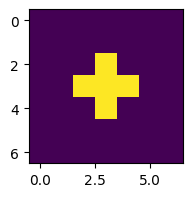

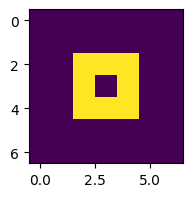

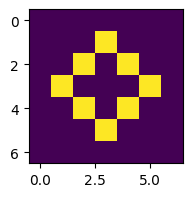

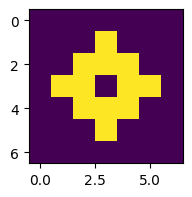

In [41]:
z = grid0

plt.figure(figsize=(2,2))
plt.imshow(z)
for i in range(3):
    z = advance(z)
    plt.figure(figsize=(2,2))
    plt.imshow(z)



This works, but let's run it for more steps and plot in a single figure (see {numref}`notes-subplots-ref`):

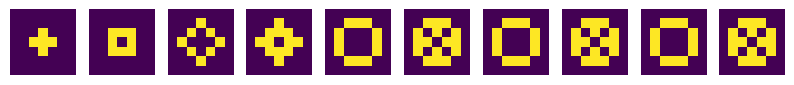

In [44]:
num = 10
fig, axes = plt.subplots(1, num, figsize=(10,2))
z = grid0

# Plot initial grid
axes[0].imshow(z)
axes[0].axis("off")


for i in range(num-1):
    z = advance(z)
    axes[i+1].imshow(z)
    axes[i+1].axis("off")

Comparing to an [online simulator](https://academo.org/demos/conways-game-of-life/) this is correct up to the 5th step. The problem is that our array isn't big enough, so the rules break down at the edges. Let's try a bigger array.

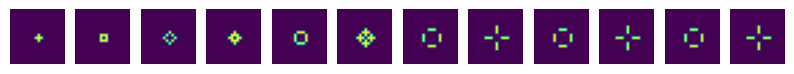

In [70]:
z = np.zeros((20, 20))
z[10,9:12] = 1
z[9:12,10] = 1

num = 12
fig, axes = plt.subplots(1, num, figsize=(10,2))

# Plot initial grid
axes[0].imshow(z)
axes[0].axis("off")


for i in range(num-1):
    z = advance(z)
    axes[i+1].imshow(z)
    axes[i+1].axis("off")